# Project Title: Binary Classification of Diabetes Using a Neural Network


In this notebook, we aim to build a simple neural network for binary classification to predict whether an individual has diabetes based on several medical attributes. The dataset used is the Pima Indians Diabetes dataset, which contains features like age, BMI, blood pressure, glucose levels, and more, along with a target variable indicating whether or not the individual has diabetes (0 for no, 1 for yes).

## Variables in the Notebook

- **X**: `numpy.ndarray`, the feature matrix containing input data (e.g., medical attributes for diabetes prediction).  
- **url**: `str`, the URL from which the dataset is loaded (if applicable).  
- **columns**: `list`, the list of column names representing the features in the dataset.  
- **db**: `pandas.DataFrame`, the loaded dataset before preprocessing.  
- **y**: `numpy.ndarray`, the target labels indicating the outcome (0 for no diabetes, 1 for diabetes).  
- **X_train**: `numpy.ndarray`, the feature data used for training the model.  
- **y_train**: `numpy.ndarray`, the target labels corresponding to the training data.  
- **X_test**: `numpy.ndarray`, the feature data used for testing the model.  
- **y_test**: `numpy.ndarray`, the target labels corresponding to the testing data.  
- **model**: `tensorflow.keras.Sequential`, the neural network model created using TensorFlow's Keras API.  
- **history**: `tensorflow.keras.callbacks.History`, the object storing training history, including loss and accuracy for each epoch.  
- **test_loss**: `float`, the loss value calculated on the test dataset after model evaluation.  
- **test_acc**: `float`, the accuracy achieved on the test dataset after model evaluation.  
- **predictions**: `numpy.ndarray`, the predicted probabilities or class labels for the test dataset generated by the model.  
- **fig**: `matplotlib.figure.Figure`, the figure object used for visualizing results like accuracy/loss curves or data plots.  


## 1. Import Libraries



In [10]:
# Load necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## 2. Load and Preprocess Data


### Data Overview

The Pima Indians Diabetes Dataset is a collection of medical data used for predicting whether an individual has diabetes based on various health attributes. This dataset is commonly used for binary classification tasks, and it contains 768 observations with 8 features and 1 target variable.
Dataset Description:
- **Number of Observations**: 768
- **Number of Features**: 8
- **Target Variable**: 1 (binary: 0 = No Diabetes, 1 = Diabetes)

In [11]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

db = pd.read_csv(url,names=columns)

db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Splitting the Dataset
The dataset is split into training and testing sets using the `train_test_split` function from `sklearn.model_selection`. The features are normalized by standardizing them using `StandardScaler`, which scales the data to have a mean of 0 and a standard deviation of 1. The target labels are also split into corresponding training and testing sets. This ensures that the model is trained on one subset of the data and evaluated on another, helping assess its generalization performance.

In [12]:
# Separate the features and the target variable
X = db.drop(columns=['Outcome'])  # Features
y = db['Outcome']  # Target (0 = No Diabetes, 1 = Diabetes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Model creation and compilation

In this section, we define and build a neural network model using TensorFlow's Keras API. The model consists of an input layer, a hidden layer with ReLU activation, and an output layer with a sigmoid activation function for binary classification. The hidden layer allows the model to learn non-linear patterns in the data, while the output layer provides a probability of the target class (diabetes or no diabetes). After defining the model architecture, we compile it with the Adam optimizer and binary crossentropy loss function, suitable for binary classification tasks. The model summary provides an overview of the layers, the number of parameters, and the structure of the network.

### Create a simple neural network with one hidden layer:

In [33]:
# Define the model
model = Sequential([
    Dense(12,input_dim=(len(columns)-1),activation='relu'), # Hidden layer with 12 neurons
    Dense(1,activation='sigmoid') # Output layer
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the Model
Use the adam optimizer and binary crossentropy loss function:

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## 4. Model training
Train the model for 50 epochs, using the training data:

In [22]:
history = model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7282 - loss: 0.4794 - val_accuracy: 0.7480 - val_loss: 0.4827
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8024 - loss: 0.4367 - val_accuracy: 0.7480 - val_loss: 0.4828
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7522 - loss: 0.4656 - val_accuracy: 0.7480 - val_loss: 0.4831
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7796 - loss: 0.4499 - val_accuracy: 0.7480 - val_loss: 0.4828
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7823 - loss: 0.4549 - val_accuracy: 0.7480 - val_loss: 0.4827
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7546 - loss: 0.4666 - val_accuracy: 0.7398 - val_loss: 0.4818
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7922 - loss: 0.4279 - val_accuracy: 0.7398 - val_loss: 0.4823
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8068 - loss: 0.4221 - val_accuracy: 0.7398 - val_loss

## 5. Evaluation
Evaluate the model using the test set to check its performance:

In [23]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7268 - loss: 0.5522 
Test accuracy: 73.38%


## 6. Make Predictions
Once the model is trained, let's make predictions for new data:

In [24]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)

# Show a sample prediction
index = 0  # Show the first test sample
print(f"Predicted: {predictions[index][0]}, Actual: {y_test.iloc[index]}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted: 0, Actual: 0


## 7. Visualizations and results
It’s helpful to visualize the training and validation accuracy and loss over epochs:

Text(0.5, 1.0, 'Training and Validation Loss')

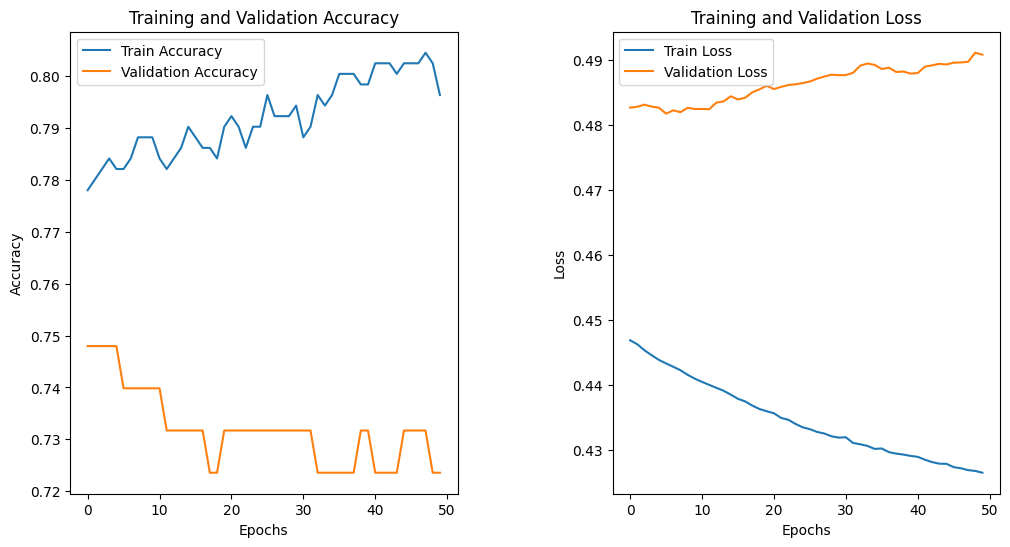

In [ ]:
fig = plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')



### Conclusion

In this notebook, we successfully demonstrated the process of predicting diabetes using a neural network model. We utilized the **Pima Indians Diabetes dataset**, which contains medical data and corresponding labels indicating whether an individual has diabetes. The workflow included:

1. [Import Libraries](#1-Import-Libraries)
2. [Load and Preprocess Data](#2-Load-and-Preprocess-Data)
3. [Model creation and compilation](#3-Model-creation-and-compilation)
4. [Model training](#4-Model-training)
5. [Evaluation](#5-Evaluation)
6. [Make Predictions](#6-Make-Predictions)
7. [Visualizations and results](#7-Visualizations-and-results)

The neural network model achieved a reasonable accuracy in predicting whether an individual has diabetes based on the provided features. This notebook serves as a practical example of how to implement and train a neural network for binary classification tasks in healthcare data, demonstrating the utility of machine learning in predicting medical conditions.